In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv('people.csv')
df

,age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [2]:
df.isnull().sum()

age             0
agegroup        0
height          0
status          0
yearsmarried    0
dtype: int64

In [3]:
df.describe()

,age,height,yearsmarried
count,5.000000,5.00000,5.000000
mean,59.200000,2.54000,4.800000
std,91.163041,5.45967,8.642916
min,2.000000,-7.00000,-1.000000
25%,18.000000,3.00000,0.000000
50%,21.000000,5.00000,2.000000
75%,34.000000,5.70000,3.000000
max,221.000000,6.00000,20.000000


In [4]:
def ruleset(df):
    df['Rule1'] = df['age'].apply(lambda x: True if x>0 and x<150 else False)
    df['Rule2'] = df.apply(lambda x:True if x.age > x.yearsmarried else False, axis =1)
    df['Rule3'] = df['status'].apply(lambda x: True if x == 'married' or x == 'single'  or x =='widowed' else False)
    df['Rule4'] = df.apply(lambda x: True if ((x.age <18 and x.agegroup == 'child') or 
                                             (x.age >=18 and x.age and x.age<=65 and x.agegroup == 'adult') or
                                             (x.age >65 and x.agegroup =='elderly'))  else False, axis =1)

In [5]:
ruleset(df)
df

,age,agegroup,height,status,yearsmarried,Rule1,Rule2,Rule3,Rule4
0,21,adult,6.0,single,-1,True,True,True,True
1,2,child,3.0,married,0,True,True,True,True
2,18,adult,5.7,married,20,True,False,True,True
3,221,elderly,5.0,widowed,2,False,True,True,True
4,34,child,-7.0,married,3,True,True,True,False


In [6]:
df_rule_followed = df.iloc[:,5:]
df_rule_followed = df_rule_followed.astype(int)
df_rule_followed

,Rule1,Rule2,Rule3,Rule4
0,1,1,1,1
1,1,1,1,1
2,1,0,1,1
3,0,1,1,1
4,1,1,1,0


In [7]:
df_rule_followed.describe()

,Rule1,Rule2,Rule3,Rule4
count,5.000000,5.000000,5.0,5.000000
mean,0.800000,0.800000,1.0,0.800000
std,0.447214,0.447214,0.0,0.447214
min,0.000000,0.000000,1.0,0.000000
25%,1.000000,1.000000,1.0,1.000000
50%,1.000000,1.000000,1.0,1.000000
75%,1.000000,1.000000,1.0,1.000000
max,1.000000,1.000000,1.0,1.000000


Text(0, 0.5, 'No. of rules violated')

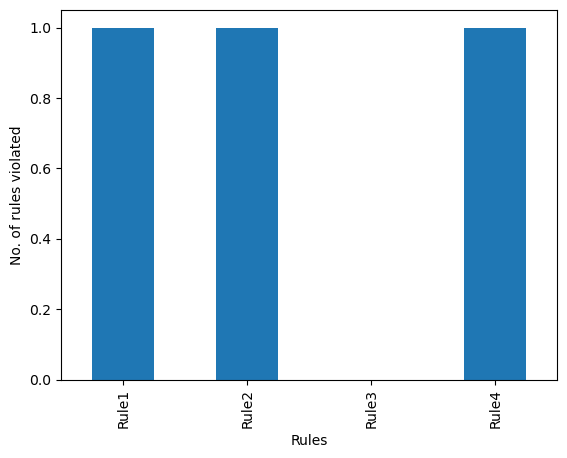

In [8]:
plt.figure()
df_rule_followed.apply(lambda x:len(x) - x.sum()).plot(kind='bar')
plt.xlabel('Rules')
plt.ylabel("No. of rules violated")